
# **MNIST Number Detection Using ANN Keras**

The MNIST database (Modified National Institute of Standards and Technology database) is a large collection of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger NIST Special Database 3 (digits written by employees of the United States Census Bureau) and Special Database 1 (digits written by high school students) which contain monochrome images of handwritten digits

The MNIST dataset is a cornerstone dataset in the world of machine learning, especially for beginners venturing into image classification and Convolutional Neural Networks (CNNs).  Here's a breakdown of the MNIST dataset in TensorFlow:

**Content:**

* **Images:** The dataset is comprised of 70,000 small grayscale images, each measuring 28x28 pixels.
* **Labels:**  Each image corresponds to a handwritten digit (0-9), providing a labeled training set for image recognition tasks.

**Split:**

* **Training Set:** 60,000 images are allocated for training your machine learning model.
* **Test Set:** The remaining 10,000 images are used to assess the model's performance after training.

**Loading in TensorFlow:**

TensorFlow offers a straightforward way to load the MNIST dataset using the `tf.keras.datasets.mnist.load_data()` function. This function conveniently returns two separate NumPy arrays: one containing the training images and another containing the training labels. There's a similar function to load the test set as well.

**Uses:**

* The MNIST dataset is a popular choice for getting started with image classification using CNNs.
* Its simplicity allows you to grasp fundamental concepts like data preprocessing, model building, training, and evaluation.
* Once comfortable, you can progress to more intricate image datasets for real-world applications.

Here are some helpful resources to delve deeper into the MNIST dataset and how to use it with TensorFlow:

* TensorFlow Tutorial on MNIST Classification with CNNs: [https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial](https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial)
* TensorFlow Documentation on `tf.keras.datasets.mnist.load_data()`: [https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)

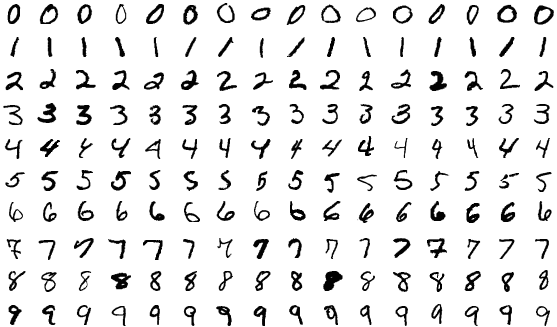

image source : https://en.wikipedia.org/wiki/MNIST_database#


The MNIST database contains 60,000 training images and 10,000 testing images.Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

In [ ]:
#importing the libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import keras

In [ ]:
#checking the version of tensorflow and keras
print(f"Tensorflow version : {tf.__version__}")
print(f"Keras version : {keras.__version__}")

Tensorflow version : 2.15.0
Keras version : 2.15.0


In [ ]:
os.getcwd() #finding the location of files

'/content'

In [ ]:
#checking the GPU & CPU
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
#check gpu and cpu present or not
check_list = ["GPU", "CPU"]

for device in check_list:
  out = tf.config.list_physical_devices(device)

  if len(out) > 0:
    print(f"{device} is available")
    print(f"Details : {out}")

  else:
    print(f"{device} is not available")

GPU is available
Details : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
Details : [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## create a simple classifier using keras on MNIST dataset

In [ ]:
#import the data
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
#create the train and test data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Here, (28, 28) means the size of each image present in dataset which consist 28X28 size of resolution of frame

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
#finding the datatype
X_train_full.dtype

dtype('uint8')

In [ ]:
#create the validation dataset and
#convert or scale the data between 0 and 1 by dividing 255
#because data is unsigned data and it ranged from 0 to 255

X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#scale the test dataset
X_test = X_test/255.

In [ ]:
len(X_train_full[5000:])

55000

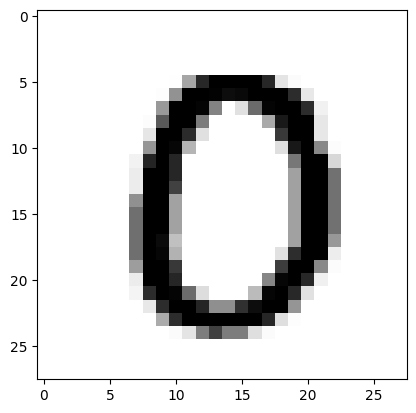

In [ ]:
#let's view some data
plt.imshow(X_train[10], cmap = "binary")
plt.show()

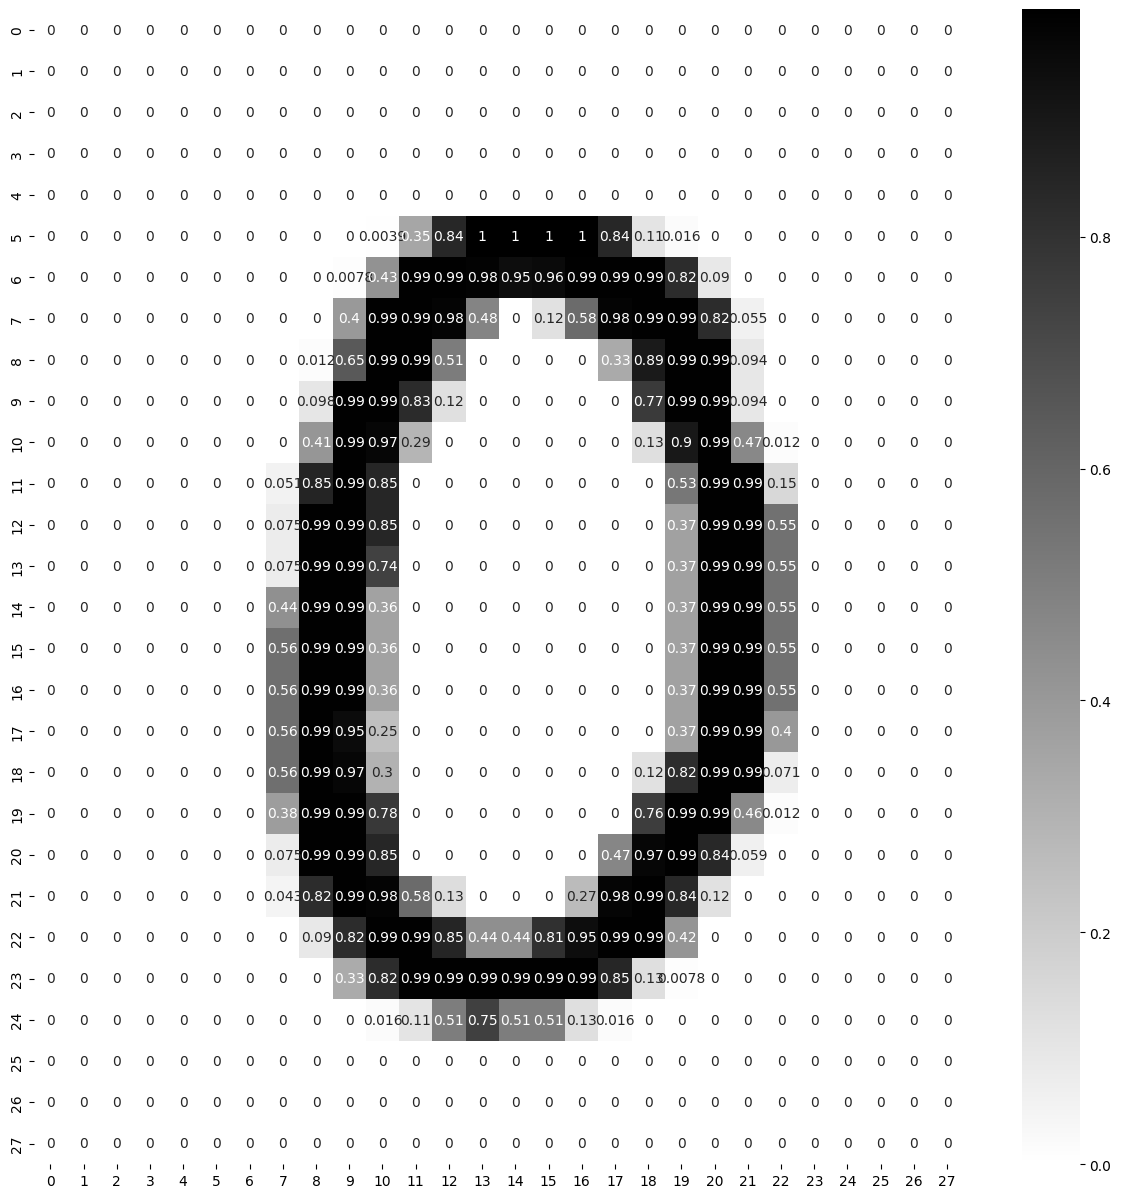

In [ ]:
#view image with binary data
plt.figure(figsize = (15, 15))
sns.heatmap(X_train[10], annot = True, cmap = "binary")
plt.show()

In [ ]:
X_train[10].round(2) #after scale the data between 0 to 1

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0. 

## TRAIN THE PARAMETERS

- here, we used 1 input layer, 2 hidden layers, and 1 output layer

- 1 input layer consist = 28X28 = 784 NN
- 1st hidden layer = 300 NN
- 2nd hidden layer = 100 NN
- output layer = 10 NN(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [ ]:
#creating the layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape = [28, 28], name = "inputLayer"),
          tf.keras.layers.Dense(300, activation = "relu", name = "hiddenLayer1"),
          tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer2"),
          tf.keras.layers.Dense(10, activation = "softmax", name = "OutputLayer")]

#create the model
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_clf.layers[3].name

'OutputLayer'

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
hidden1.get_weights()

[array([[-0.03055831, -0.01630203, -0.05690589, ...,  0.04405015,
         -0.02628559,  0.02598697],
        [ 0.06314293, -0.04626797, -0.02246989, ..., -0.05549351,
         -0.01330194,  0.01427599],
        [-0.05614378, -0.06135715, -0.005597  , ...,  0.01982211,
          0.01309201, -0.02271137],
        ...,
        [-0.02022829, -0.04994621, -0.05732782, ..., -0.05381156,
         -0.06774855, -0.03825046],
        [ 0.00069407, -0.07034287, -0.00037241, ...,  0.07116927,
         -0.03704648, -0.07142539],
        [ 0.05142924,  0.01042549, -0.02844918, ...,  0.06749804,
          0.03724903,  0.04726891]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()
weights.shape, biases.shape

((784, 300), (300,))

In [ ]:
weights

array([[-0.03055831, -0.01630203, -0.05690589, ...,  0.04405015,
        -0.02628559,  0.02598697],
       [ 0.06314293, -0.04626797, -0.02246989, ..., -0.05549351,
        -0.01330194,  0.01427599],
       [-0.05614378, -0.06135715, -0.005597  , ...,  0.01982211,
         0.01309201, -0.02271137],
       ...,
       [-0.02022829, -0.04994621, -0.05732782, ..., -0.05381156,
        -0.06774855, -0.03825046],
       [ 0.00069407, -0.07034287, -0.00037241, ...,  0.07116927,
        -0.03704648, -0.07142539],
       [ 0.05142924,  0.01042549, -0.02844918, ...,  0.06749804,
         0.03724903,  0.04726891]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
#compile the model with parameters
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD" # stochastic gradient descent
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

In [ ]:
#Train the model
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

#fit the model
history = model_clf.fit(X_train, y_train, epochs = EPOCHS,
                        validation_data = VALIDATION_SET, batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6059 - accuracy: 0.8408 - val_loss: 0.3098 - val_accuracy: 0.9134
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2908 - accuracy: 0.9161 - val_loss: 0.2460 - val_accuracy: 0.9318
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2394 - accuracy: 0.9318 - val_loss: 0.2063 - val_accuracy: 0.9412
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2058 - accuracy: 0.9413 - val_loss: 0.1847 - val_accuracy: 0.9478
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1804 - accuracy: 0.9483 - val_loss: 0.1673 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1604 - accuracy: 0.9538 - val_loss: 0.1499 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1438 - accuracy: 0.9584 - val_loss: 0.1398 - val_accurac

In [ ]:
history.params #best params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
#convert the fiting model into table
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.605925,0.840818,0.309792,0.9134
1,0.290776,0.916127,0.246048,0.9318
2,0.239353,0.931782,0.206259,0.9412
3,0.205832,0.941345,0.184670,0.9478
4,0.180375,0.948273,0.167297,0.9566
5,0.160416,0.953818,0.149886,0.9600
6,0.143799,0.958364,0.139807,0.9606
7,0.129753,0.963327,0.127243,0.9646
8,0.117994,0.966800,0.119638,0.9662
9,0.107904,0.968600,0.111415,0.9700


<Axes: >

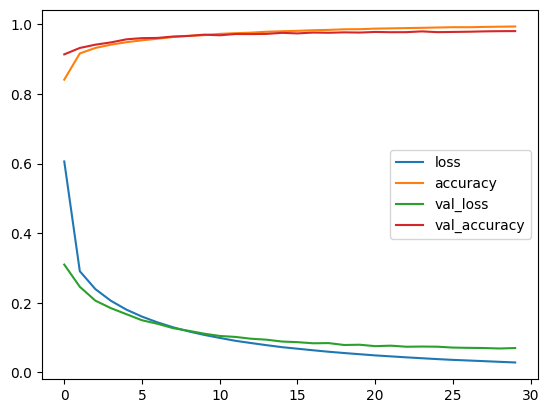

In [ ]:
#plot the fitting data to find growth of accuracy
pd.DataFrame(history.history).plot()

In [ ]:
#evaluate the accuracy
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9771


[0.0726933553814888, 0.9771000146865845]

In [ ]:
#checking with test data
x_new = X_test[:4] #predict with four images
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
actual = y_test[:4] #actual answer of above images
actual

array([7, 2, 1, 0], dtype=uint8)

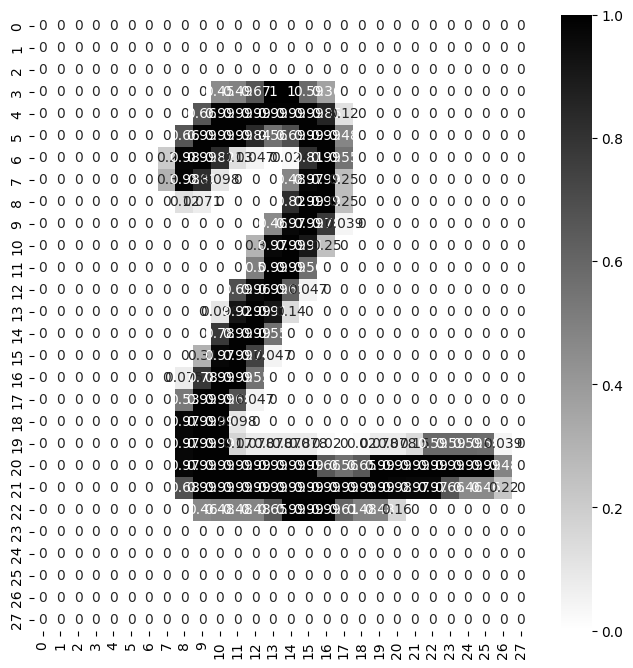

In [ ]:
plt.figure(figsize = (8, 8))
sns.heatmap(X_test[1], annot = True, cmap = "binary")
plt.show()

In [ ]:
#predict the above 4 images from train data
y_prob = model_clf.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 75ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_prob

array([[2.03087848e-06, 1.22776737e-06, 7.59587710e-05, 2.18916009e-03,
        5.07397004e-08, 9.80328309e-07, 5.80730429e-11, 9.97661710e-01,
        3.12282864e-05, 3.75990930e-05],
       [8.96525705e-07, 2.63658567e-05, 9.99795020e-01, 1.57433737e-04,
        4.25345523e-12, 4.86585668e-06, 3.72569730e-06, 2.12714950e-11,
        1.16844785e-05, 3.33256128e-13],
       [2.96260350e-06, 9.98385310e-01, 1.72817512e-04, 1.50631158e-05,
        1.49082189e-04, 8.58166968e-05, 1.64283294e-04, 5.07124525e-04,
        5.00830822e-04, 1.67046237e-05],
       [9.99692082e-01, 2.10680128e-07, 1.39142037e-04, 6.74583475e-07,
        6.23322819e-07, 6.88714294e-07, 4.23544116e-05, 6.57177079e-05,
        1.33073463e-08, 5.85392918e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)
y_pred

array([7, 2, 1, 0])

In [ ]:
actual

array([7, 2, 1, 0], dtype=uint8)

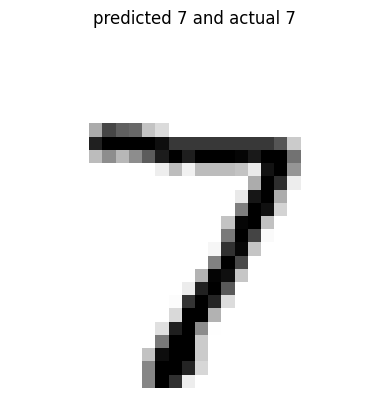

------------------------------------------------


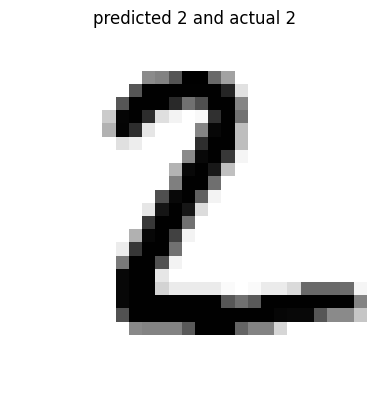

------------------------------------------------


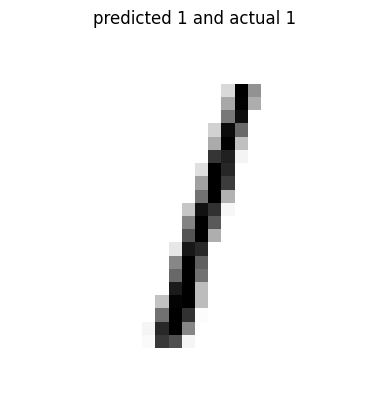

------------------------------------------------


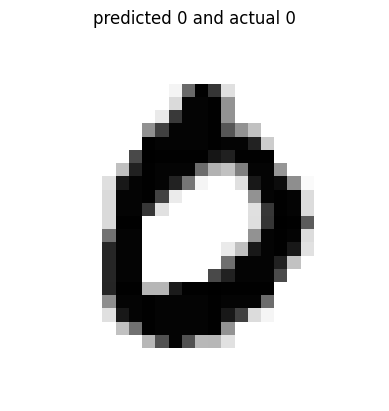

------------------------------------------------


In [ ]:
#plot both actual and predicted values
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap = "binary")
  plt.title(f"predicted {pred} and actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("------------------------------------------------")

## Conclusion
we have successfully completed the detection of numbers from numerical images with loss: 0.0728 ~ 07.28% and total accuracy: 0.9772 ~ 97.72 %